In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = {"traj":"red","gt":"blue", "trajF":"#9CAB4A", "trajFi":"#009446", "trajFia":"#183A71" , "trajlstm":"purple"}
names = {"traj":"Concatenation","trajlstm":"Memory","gt":"Ground Truth", "trajF":"F - Temporal Conv", "trajFi":"F - Iterative (No Attn)", "trajFia":"F - Iterative (Ours)" , "traj_tconv":"Temporal Conv"}


d5 = [0.40,0.41,0.83,0.34,0.23,0.47,0.26, 0.32, 0.74,0.49,0.50,0.70,0.70,
 0.86,0.92,0.44,0.62,0.90,0.48,0.60,0.82,0.72,0.77,0.90,0.93,1.0,1.0,
 0.66,0.72,0.92,0.53,0.73,0.84,0.99,0.91,0.92]


# d6 = [0.26,0.25,0.77,0.24,0.20,0.41,0.21,0.21,0.49,0.29,
#  0.38,0.77,0.48,0.69,0.93,0.39,0.45,0.91,0.34,0.46,0.85,
#  0.59,0.66,0.88,0.61,0.89,0.96,0.51,0.64,0.93,0.41,0.62,0.87,0.73,
#  0.76,0.88,1.0,1.0,1.0,0.65,0.95,0.97,0.65,0.86,0.91,1.0,0.94,0.96]


d7 = [0.26,0.22,0.23,0.21,0.11,0.14,0.17,0.14,0.34,0.35,0.34,0.44,0.42,0.51,
 0.91,0.31,0.25,0.90,0.27,0.27,0.81,0.48,0.60,0.50,0.49,0.74,0.96,0.43,0.53,0.94,
 0.30,0.49,0.79,0.64,0.66,0.88,0.85,1.0,1.0,0.66,0.91,1.0,0.50,0.86,0.90,0.99,0.94,0.89]

d = d5 + d7


sr = {}
i = 0
for s in [5,7]:
    sr[s] = {}
    for q in [10,50,100, 500]:
        if (s == 5) and (q == 500):
            continue
        sr[s][q] = {}
        for m in ["one_to_one", "one_to_many","many_to_one","masterswitch"]:
            sr[s][q][m] = {}
            for t in ["trajF", "trajFi", "trajFia"]:
                sr[s][q][m][t] = [1] * int(100 * d[i]) + [0] * int(100 * (1-d[i]))
                i += 1

# print(sr)
        

    
    

In [22]:
def barplot(structure, num):
    if num == 5:
        n_groups = 3
    else:
        n_groups = 4
    
    means_tr = {}
    stderr_tr = {}
#     means_ts = {}
#     stderr_ts = {}
#     for spl in ["train", "test"]:
    for m in ["trajF", "trajFi", "trajFia"]:
        means_tr[m] = []
        stderr_tr[m] = []

        for seen in [10,50,100, 500]:
            if (num == 5) and (seen == 500):
                continue
#                 if spl == "train":
            means_tr[m].append(np.mean(sr[num][seen][structure][m]))
            stderr_tr[m].append(np.std(sr[num][seen][structure][m]) / np.sqrt(len(sr[num][seen][structure][m])))
#                 else:
#                     means_ts[m].append(np.mean(r8))
#                     stderr_ts[m].append(np.std(r8) / np.sqrt(len(r8)))

#     print(means_tr,stderr_tr,means_ts,stderr_ts )
    fig, ax = plt.subplots(dpi=600)

    index = np.arange(n_groups)
    bar_width = 0.2
    dels = [-1*bar_width, 0, bar_width]
    
    
    opacity = 0.6
    error_config = {'ecolor': '0.3'}
    
    for i, m in enumerate(["trajF", "trajFi", "trajFia"]):
        ax.bar(index+dels[i], means_tr[m], bar_width,
                alpha=opacity, edgecolor="white",
                yerr=stderr_tr[m], error_kw=error_config,
                label=names[m], color = colors[m] )
#         ax.errorbar(index, means_tr[m],
#                 alpha=opacity,
#                 yerr=stderr_tr[m],
#                 label=names[m])
        
#     if spl == "train":
#         wrd = "Seen"
#     else:
#         wrd = "Unseen"
    ax.set_ylabel('F1 Score', fontsize=20)
    ax.set_xlabel('Number of Seen Causal Structures', fontsize=20)
#     ax.set_title('Unseen Causal Structures')
    ax.set_xticks(index)
    if num == 5:
        ax.set_xticklabels(('10', '50', '100'), fontsize=20)
    else:
        ax.set_xticklabels(('10', '50', '100', '500'), fontsize=20)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=3)
#     ax.legend()

    fig.tight_layout()
    plt.savefig("figs2/baprlot_F1"+str(structure)+"_"+str(num) +".pdf")
#     plt.show()
            
                

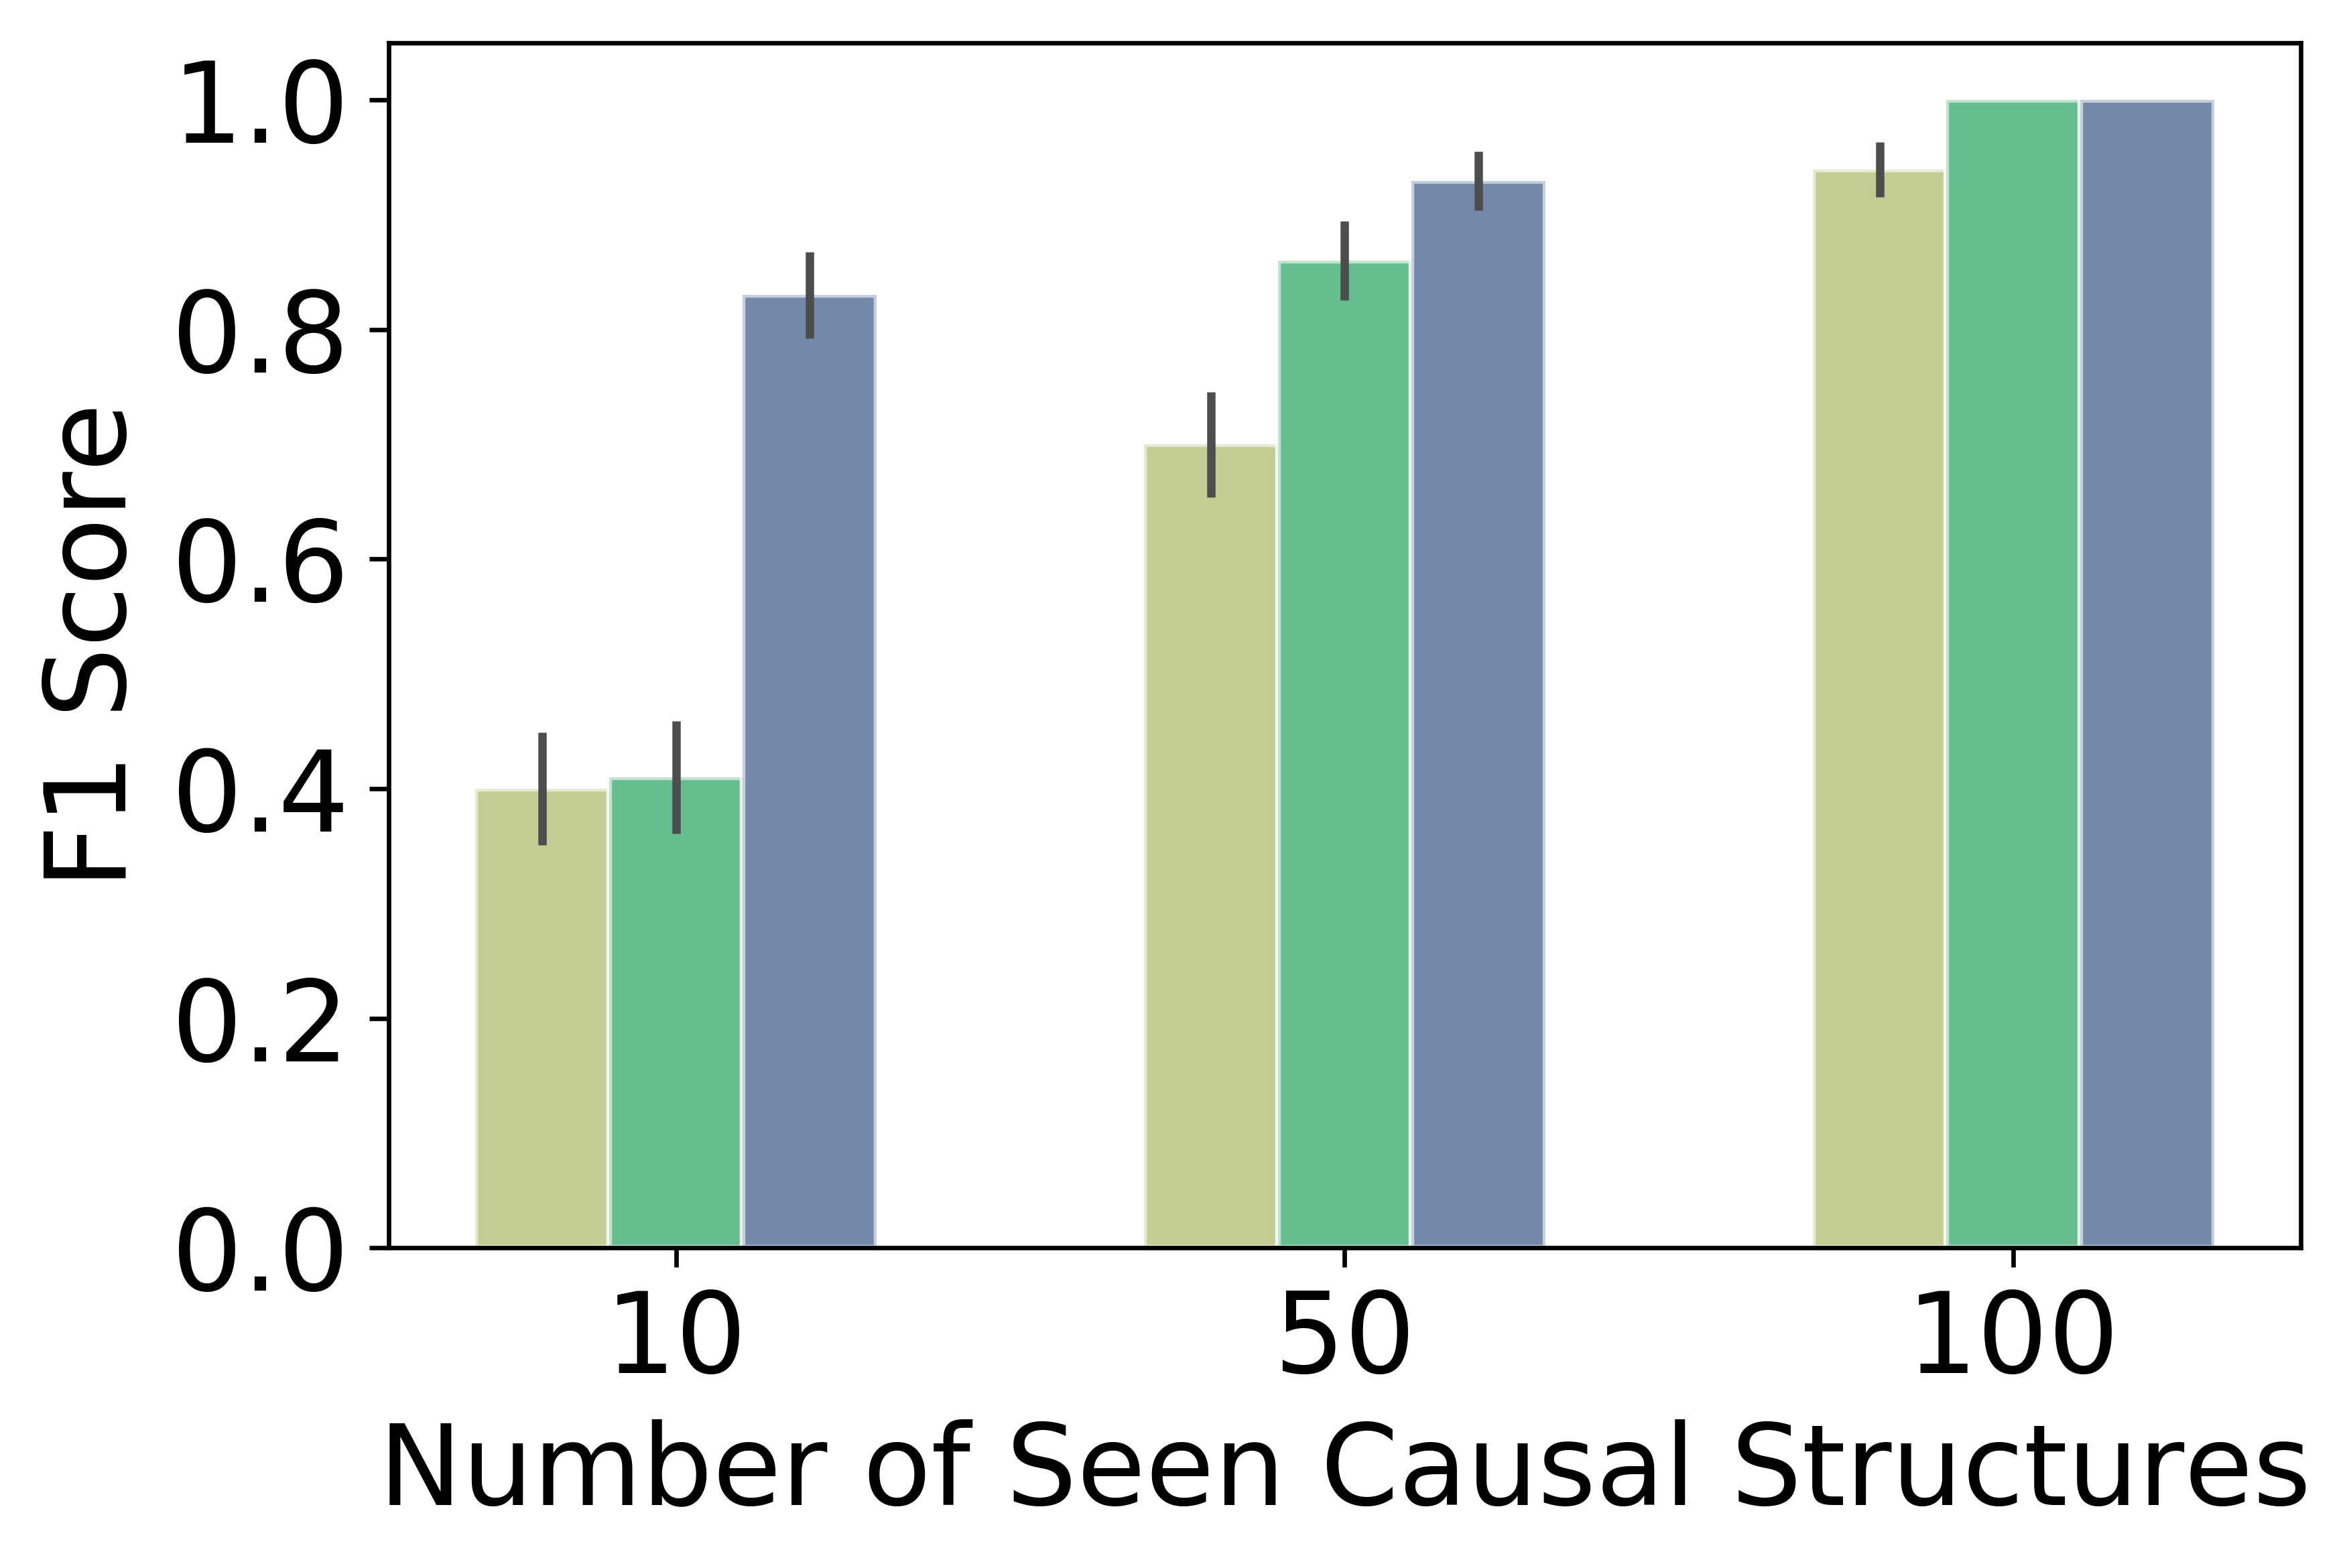

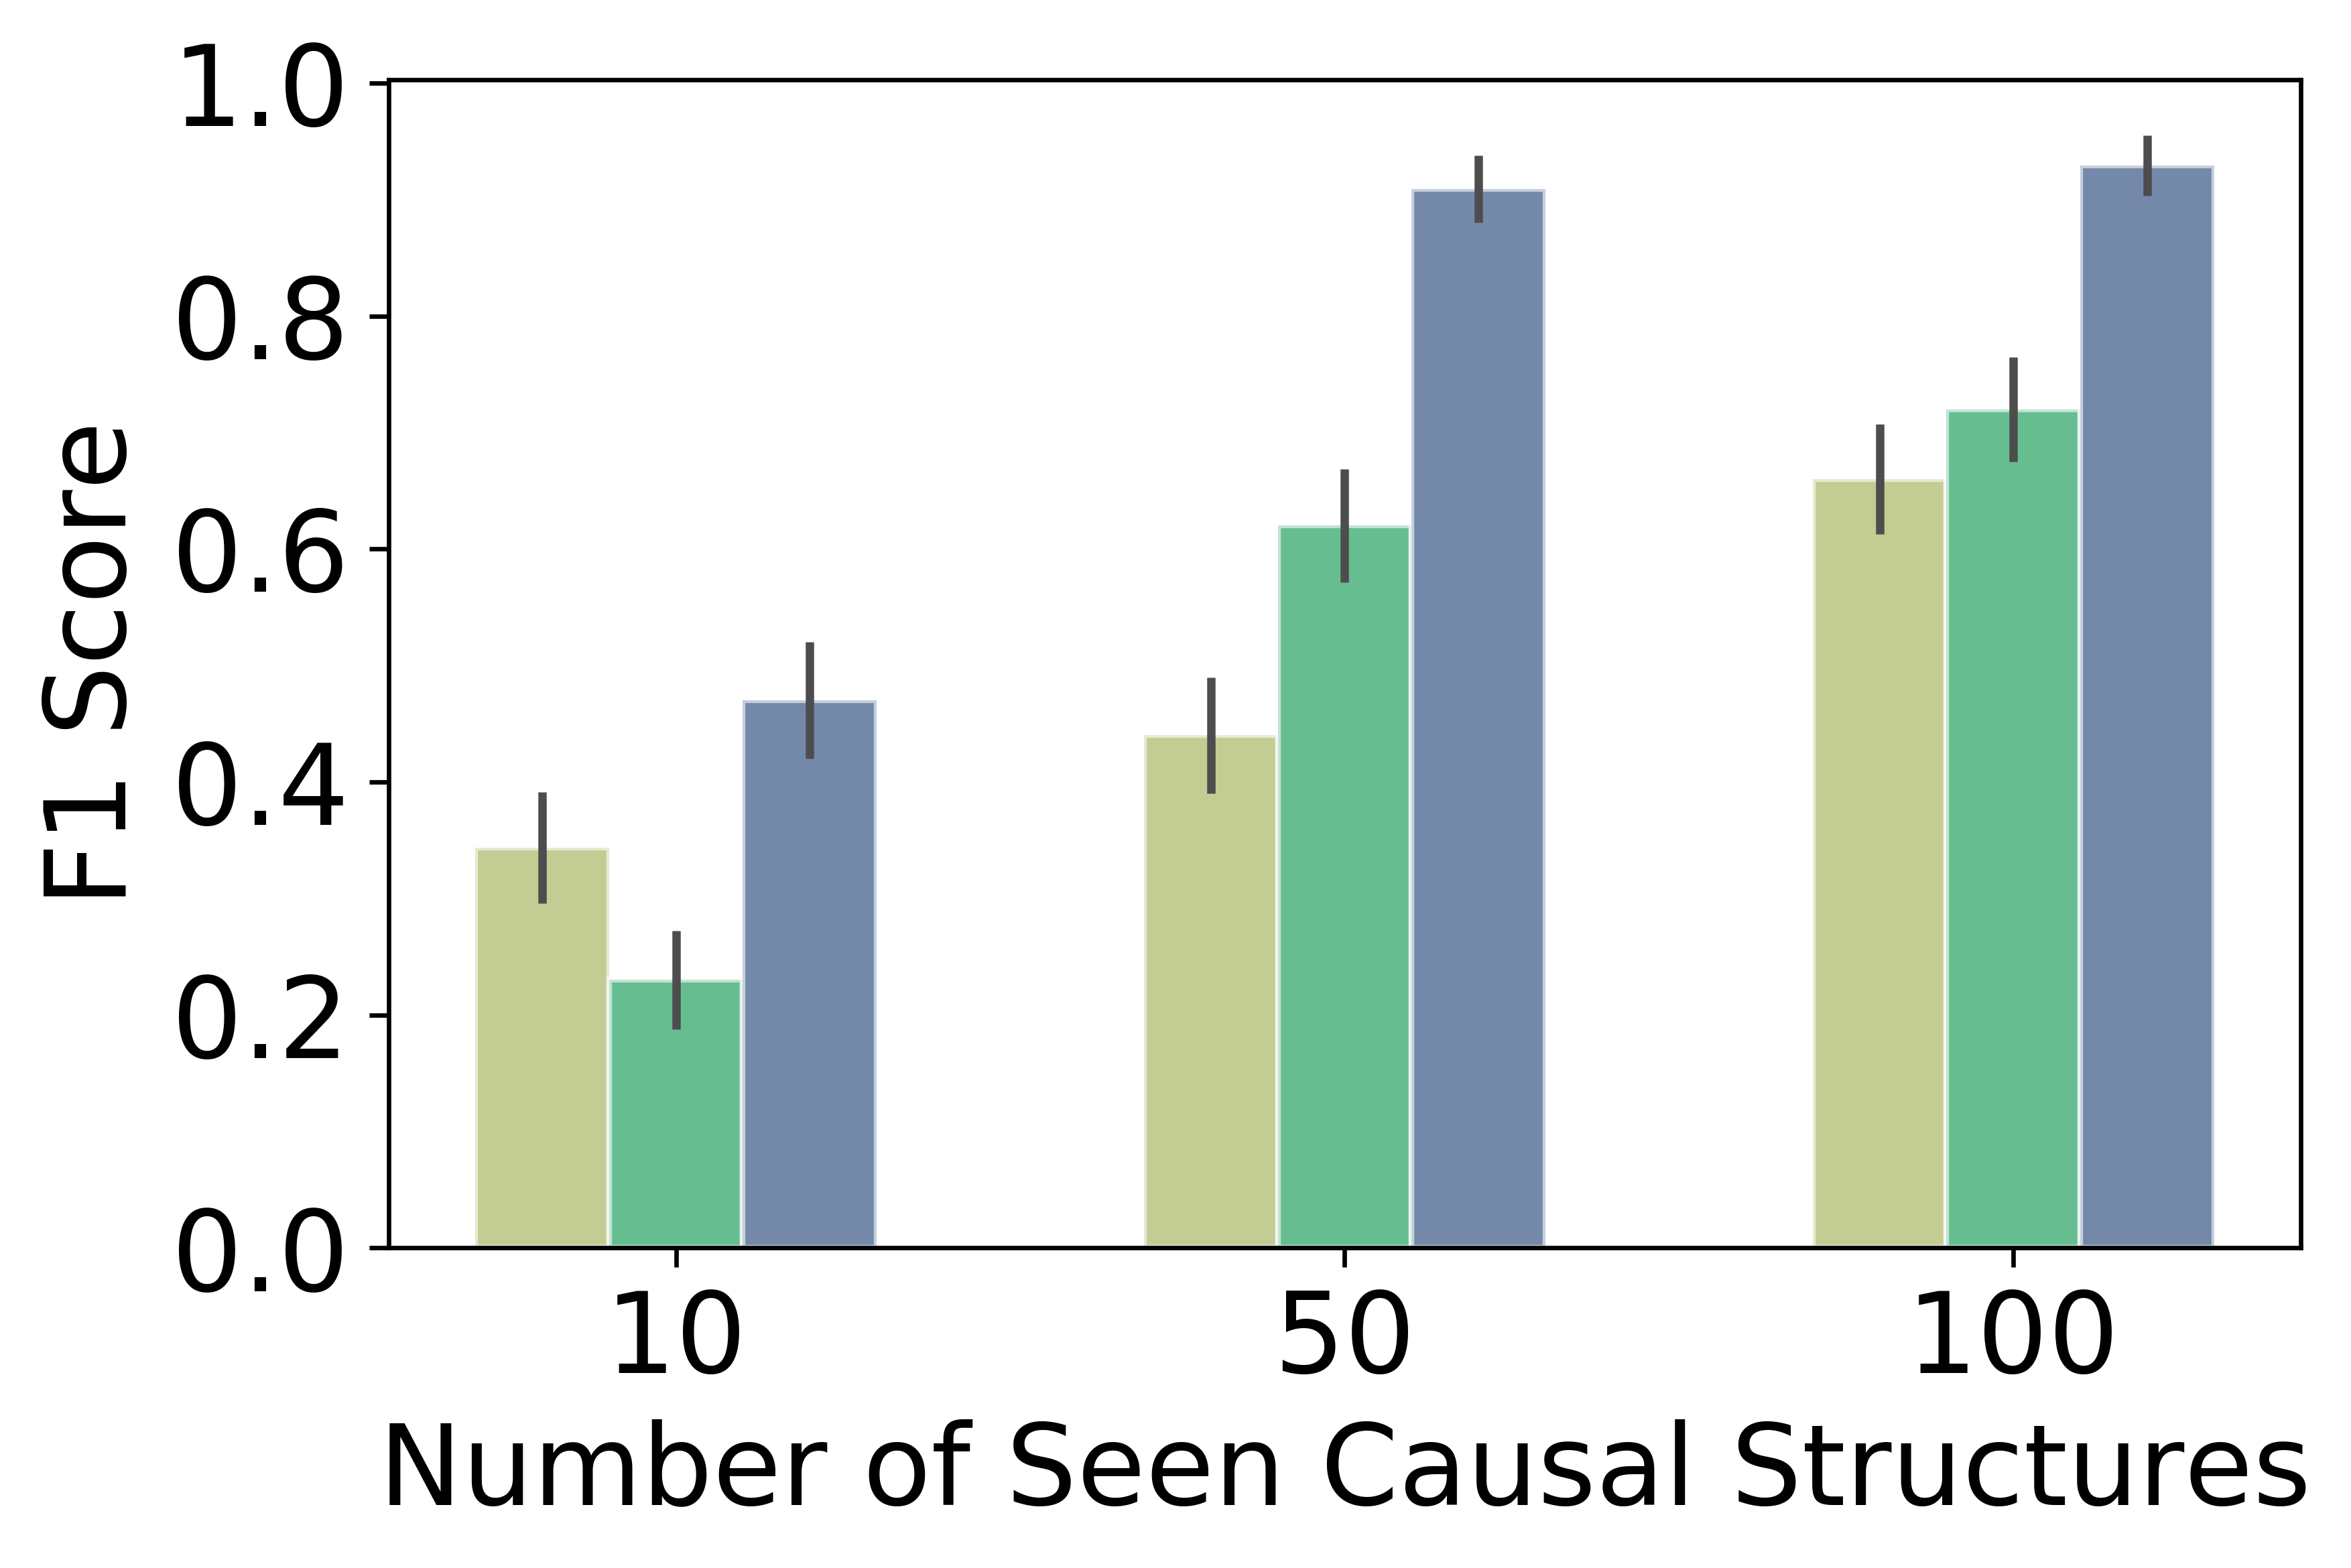

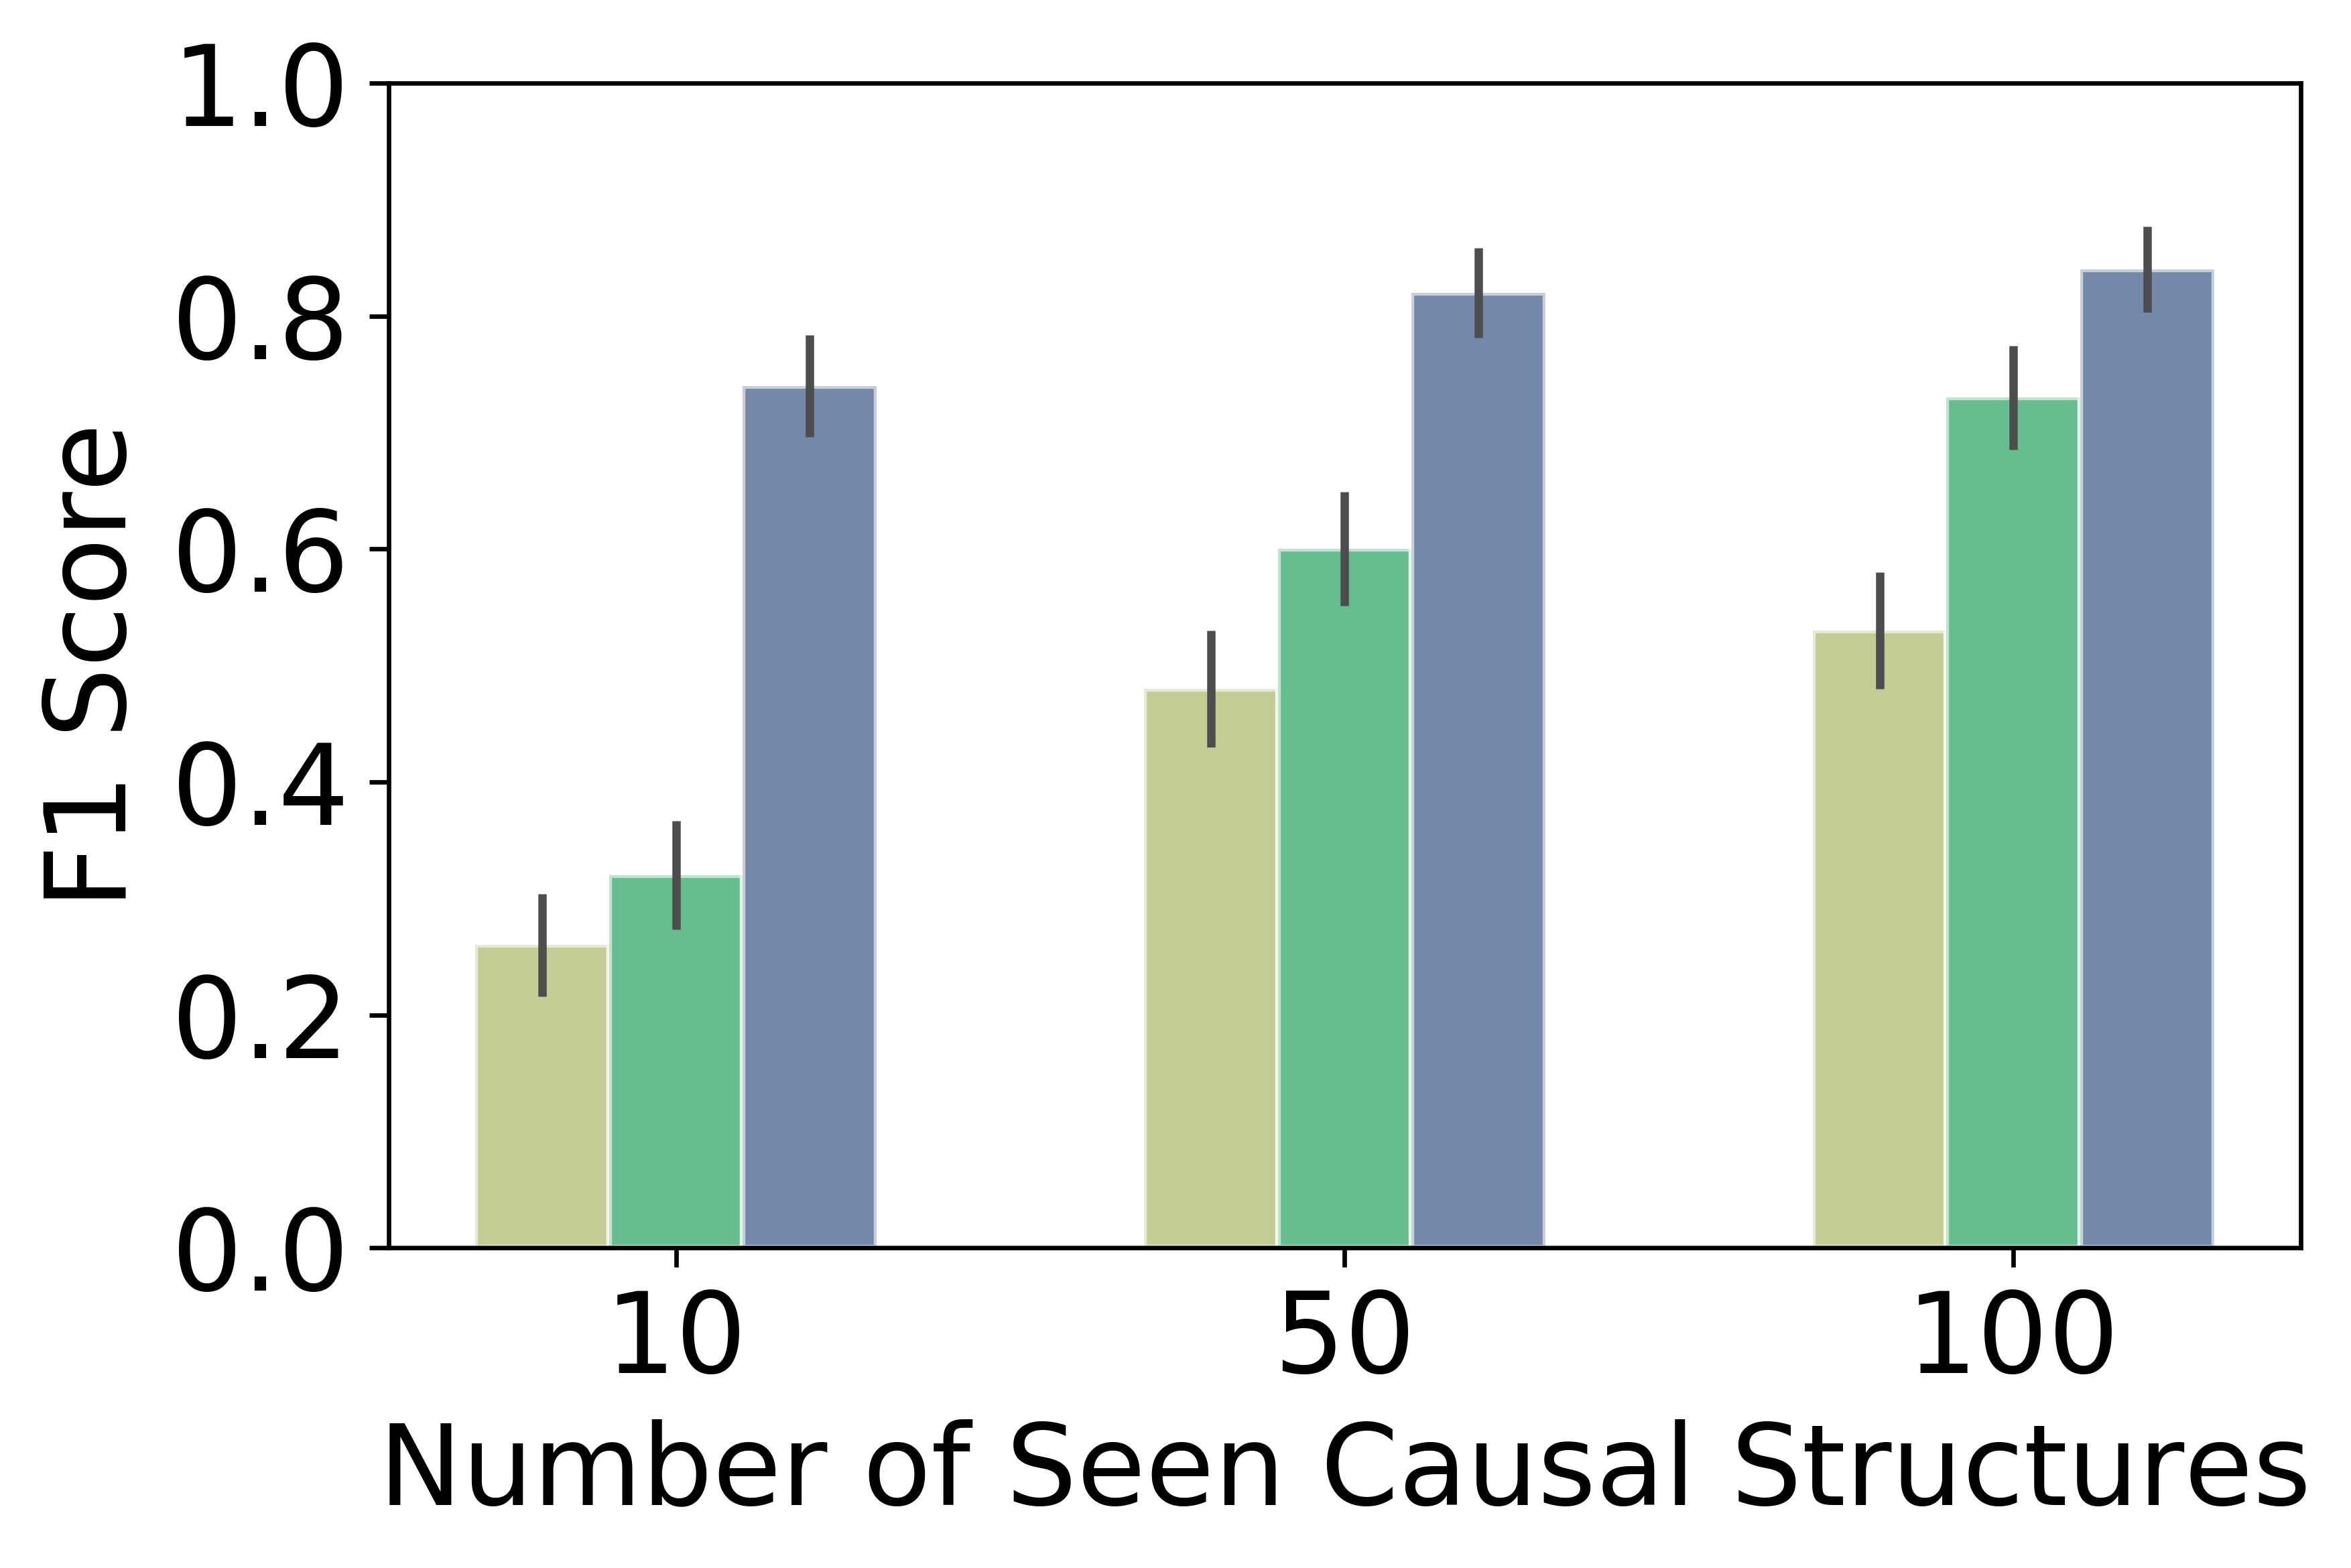

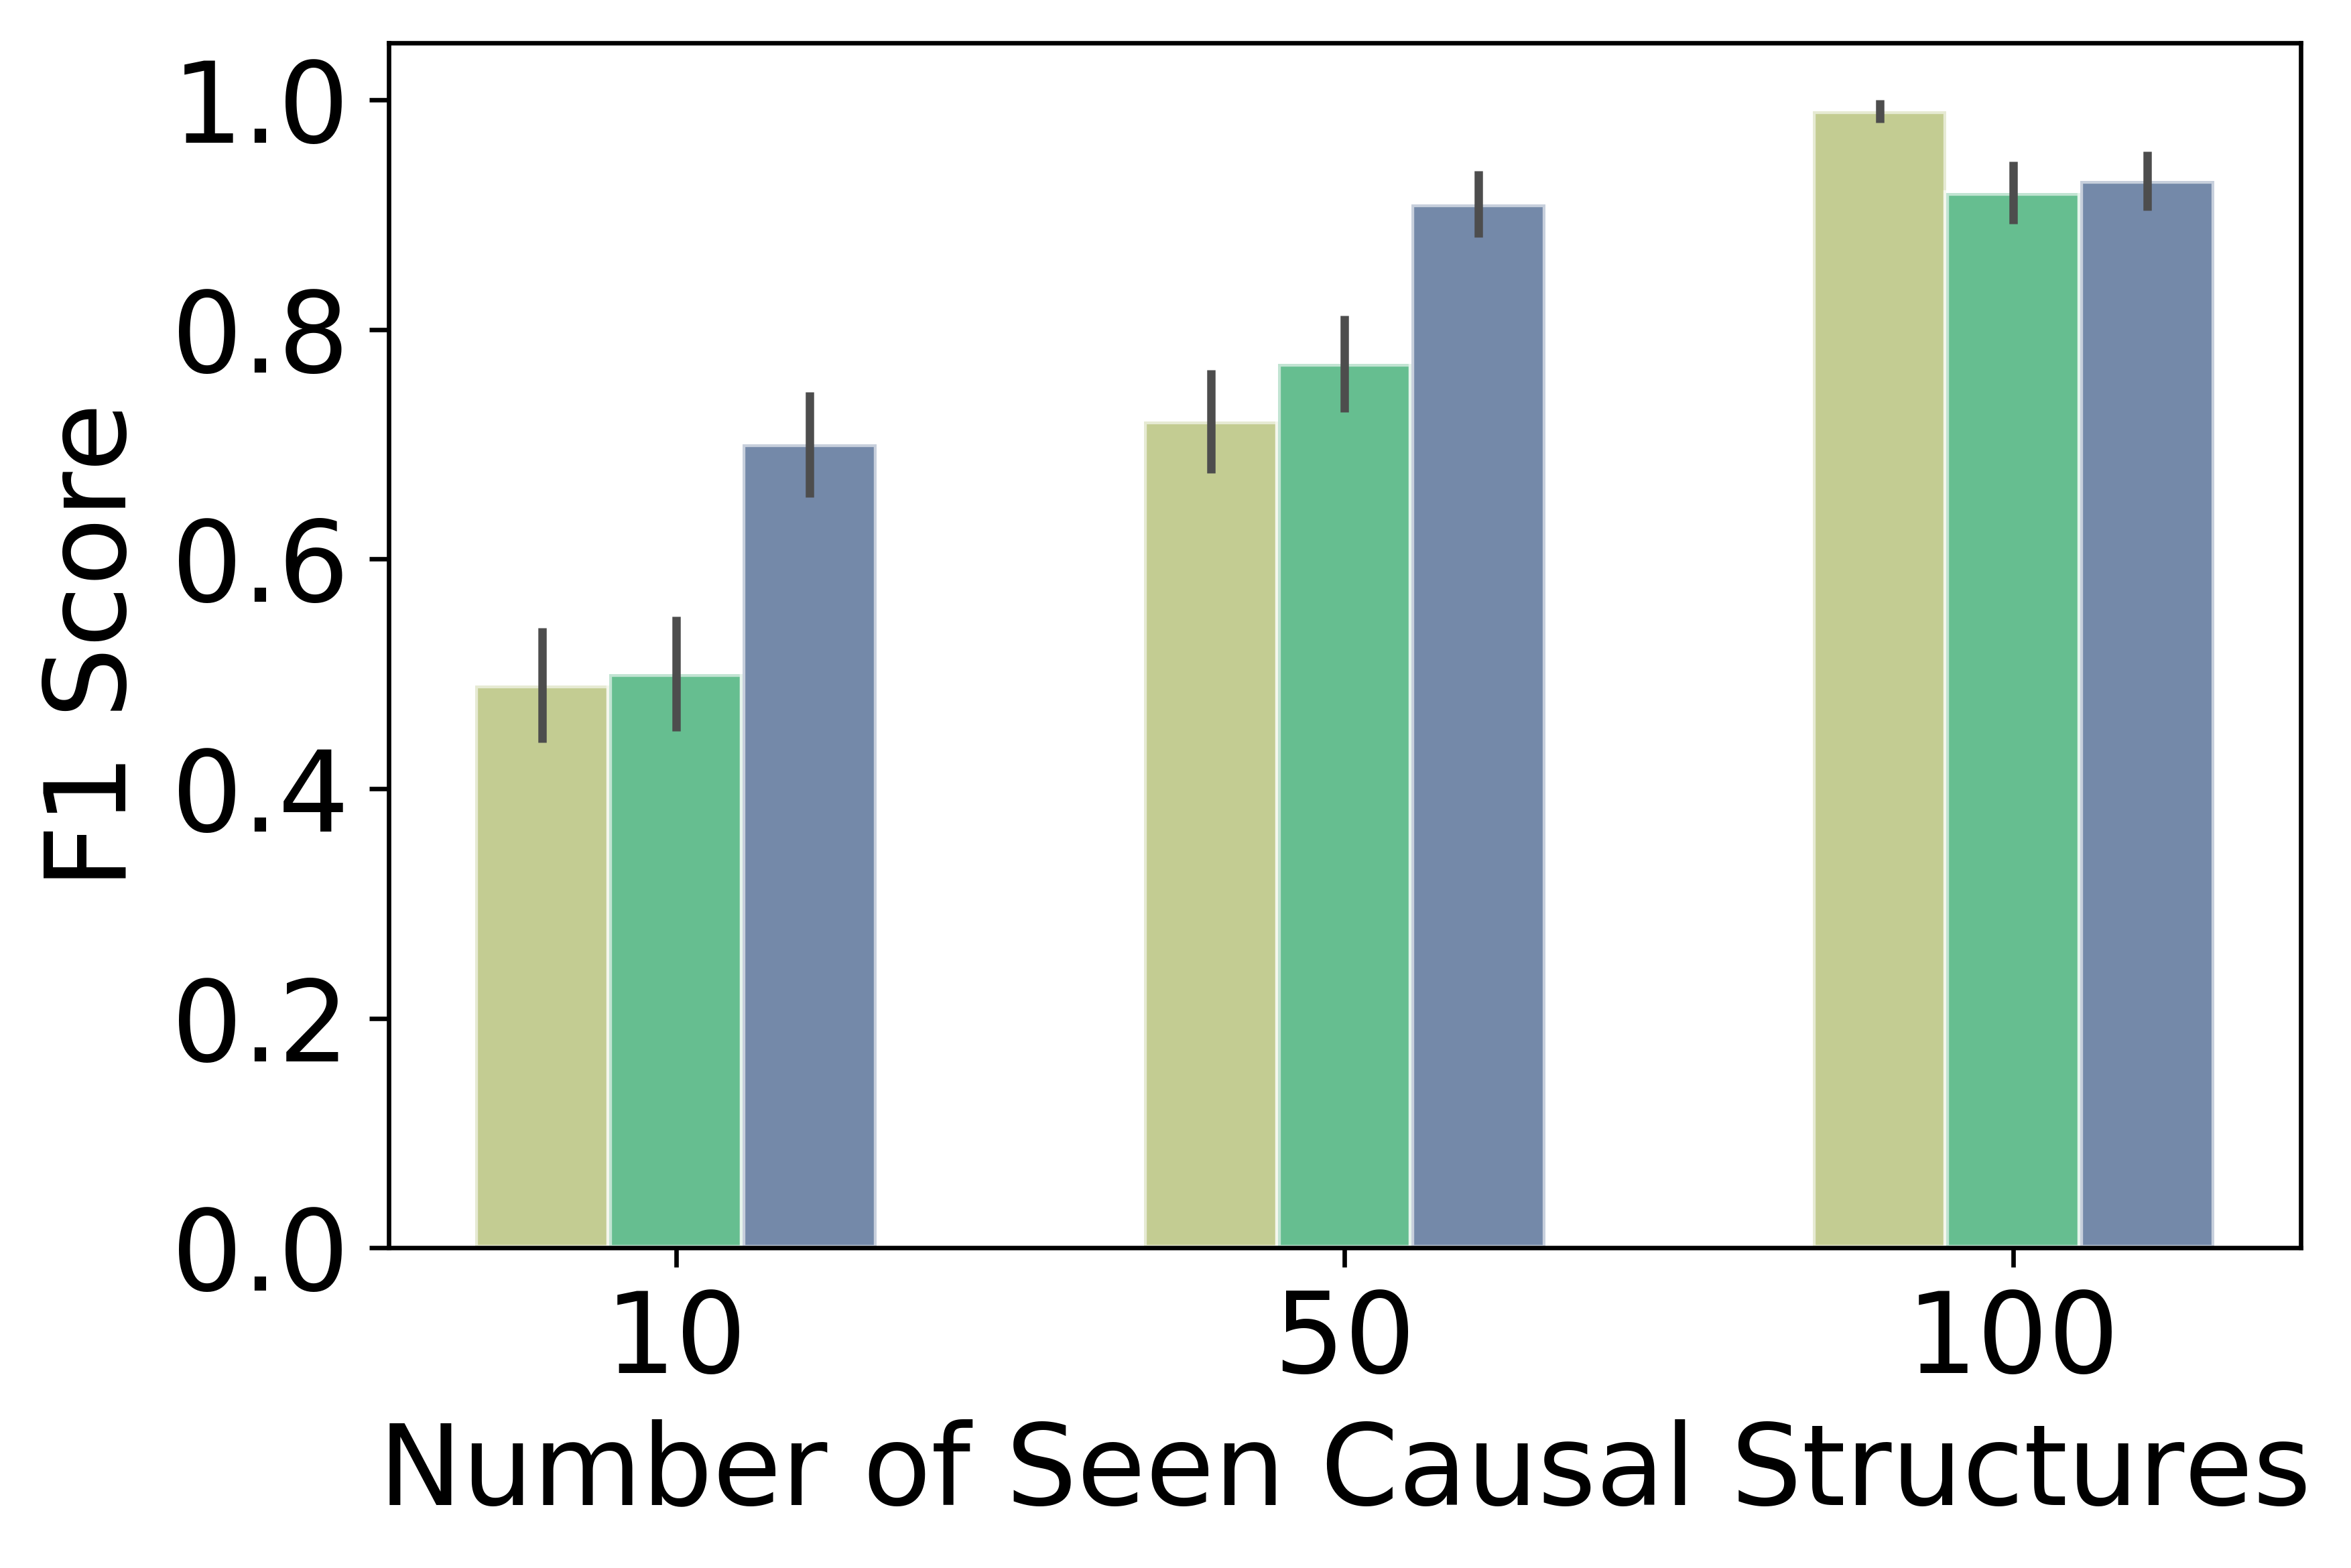

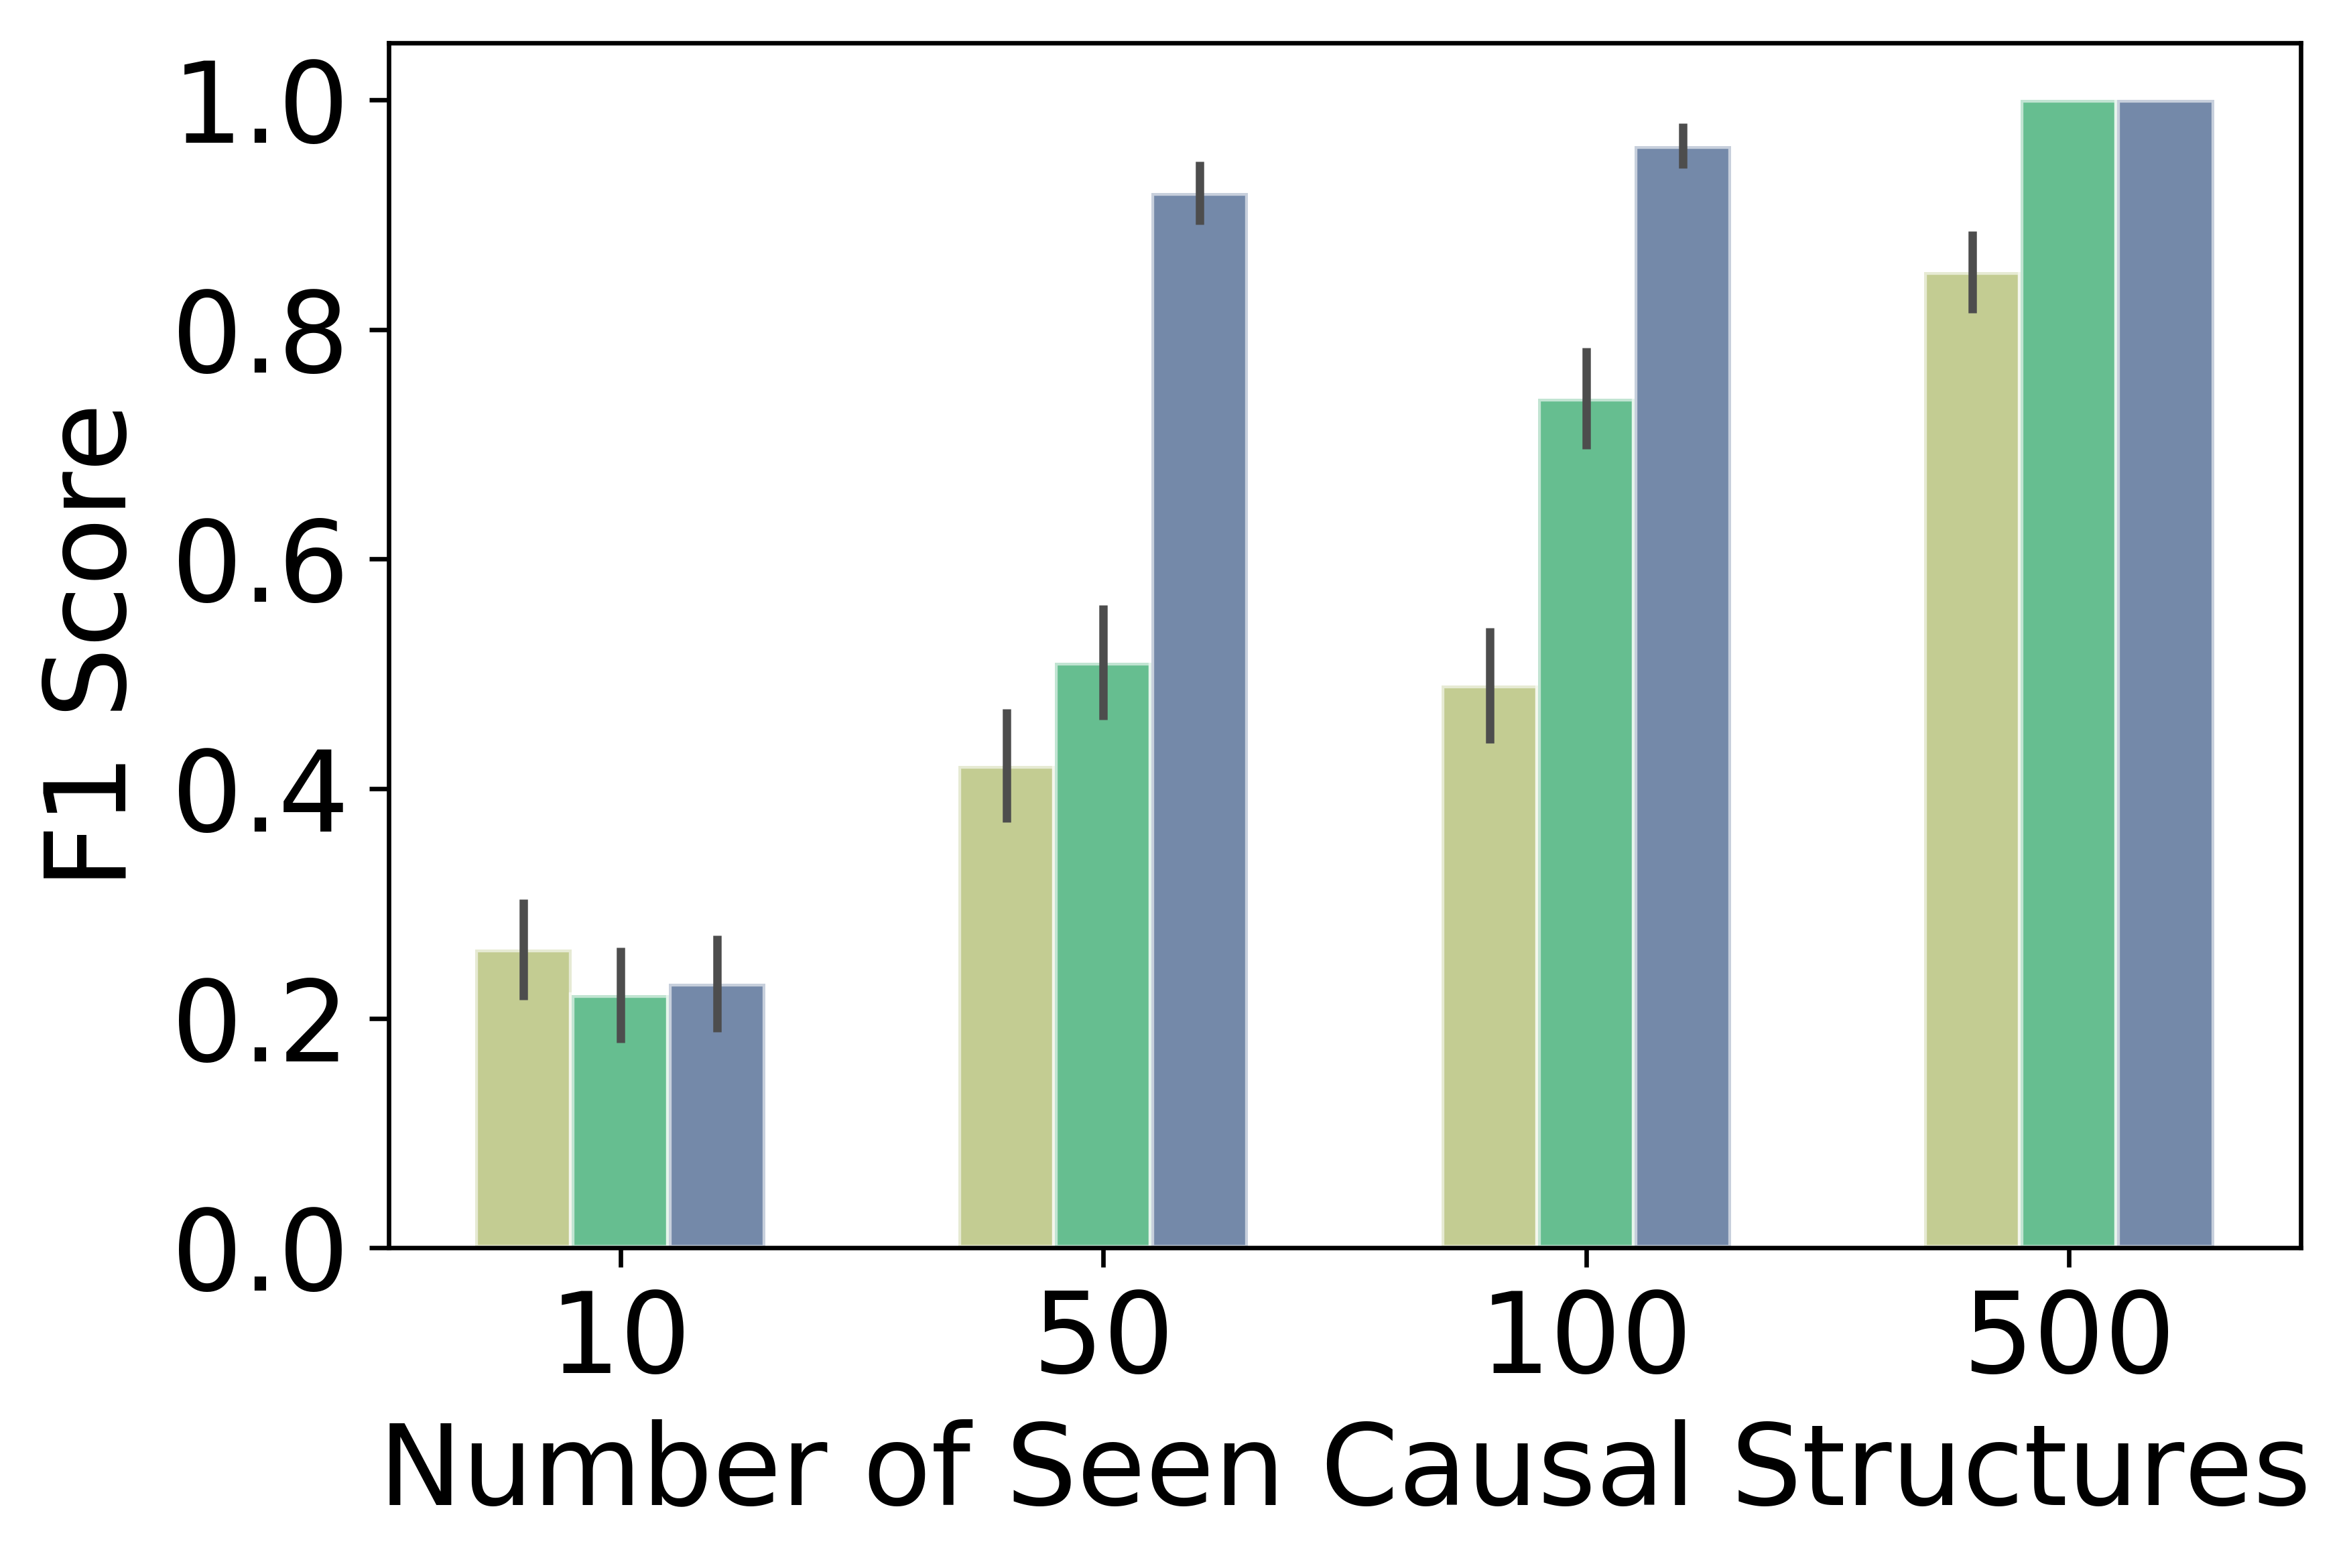

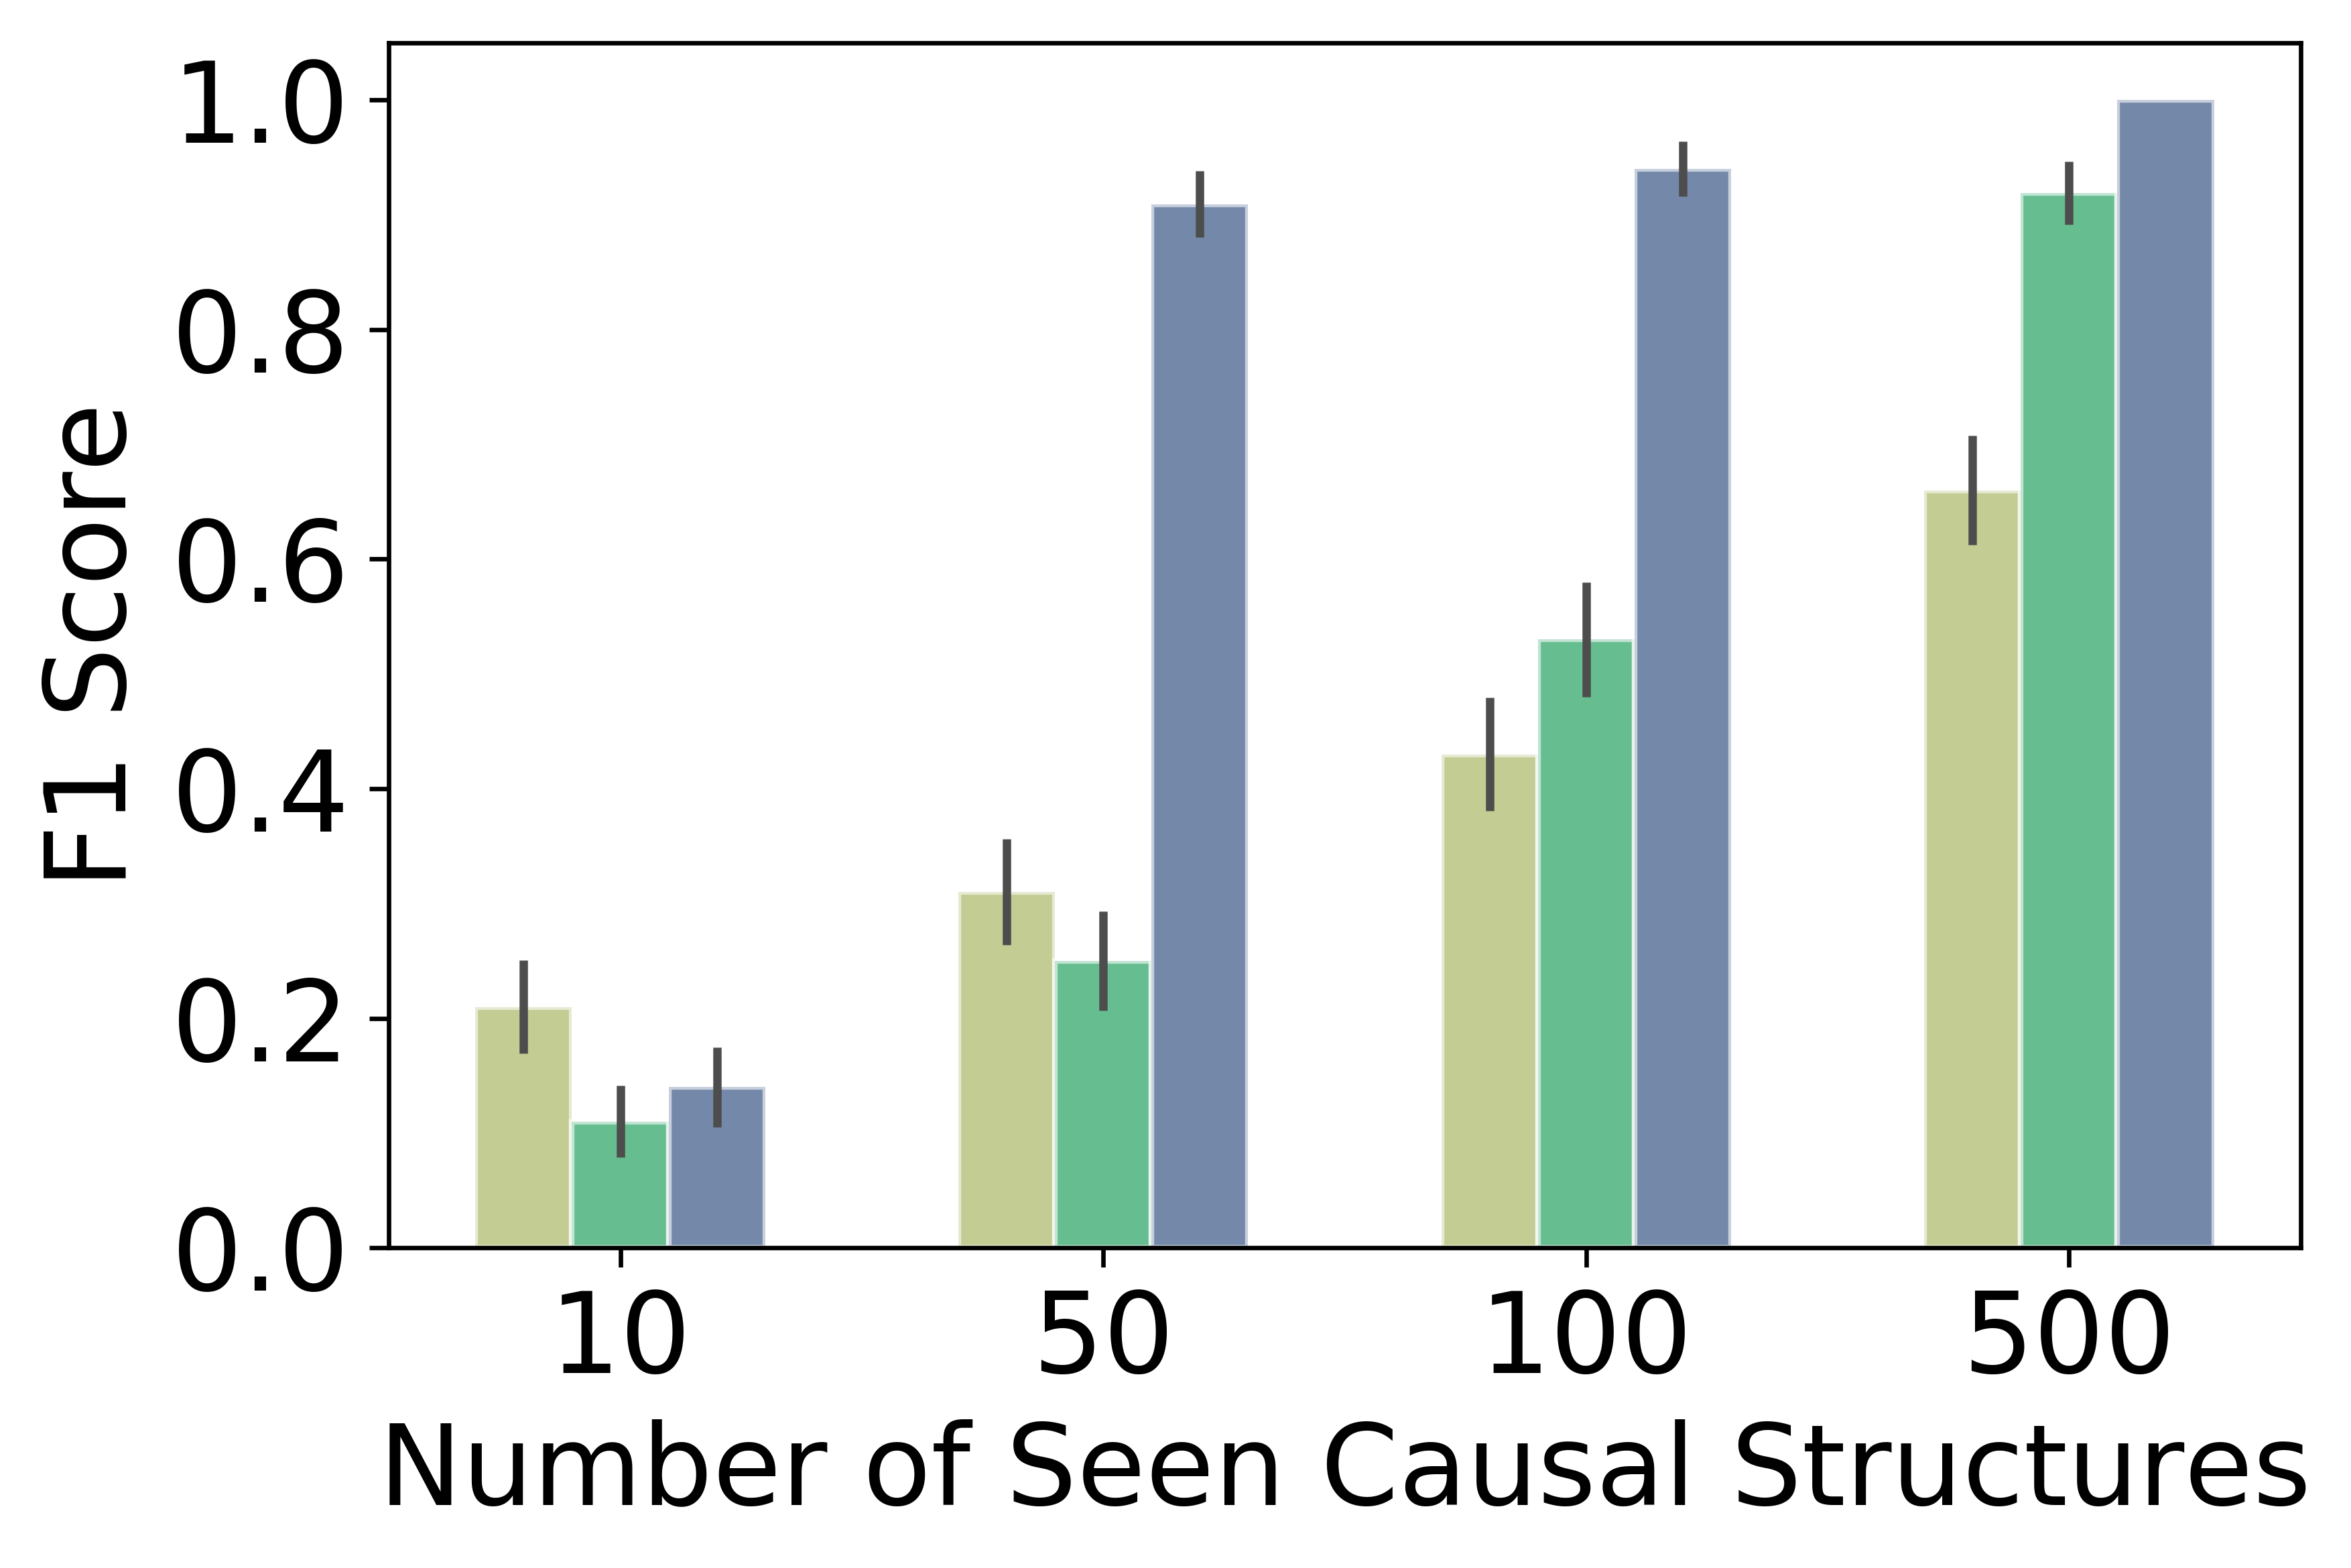

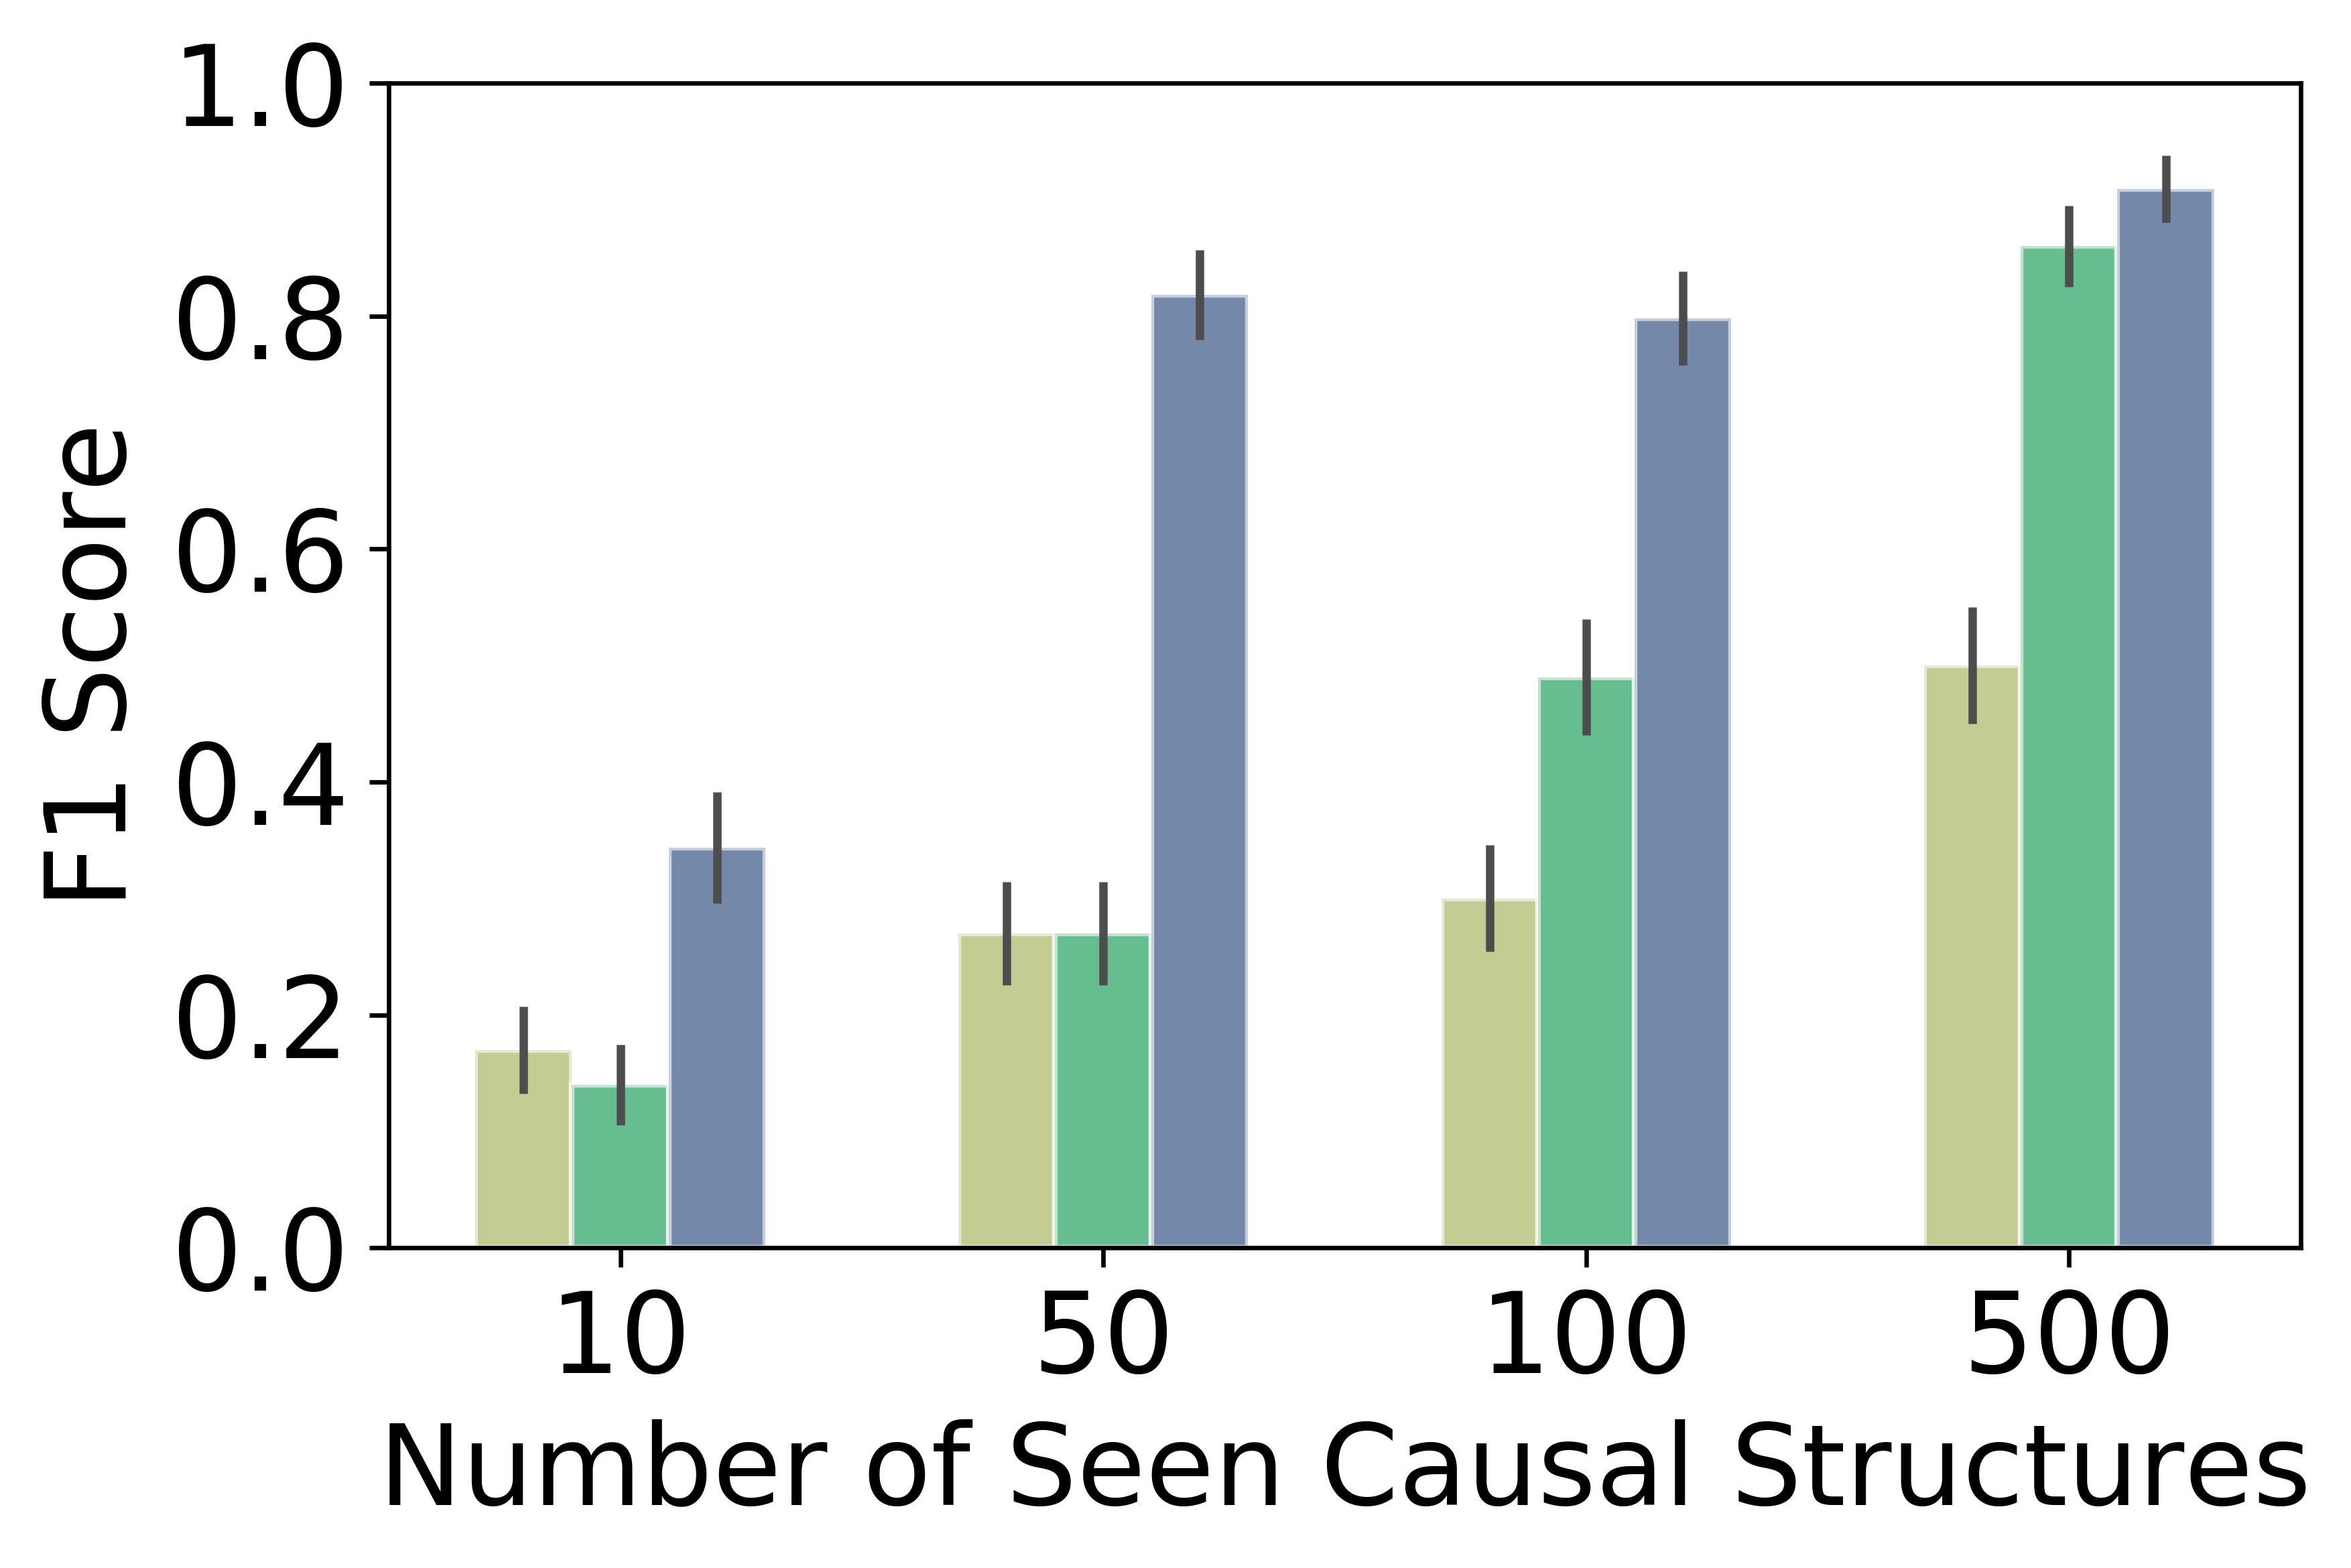

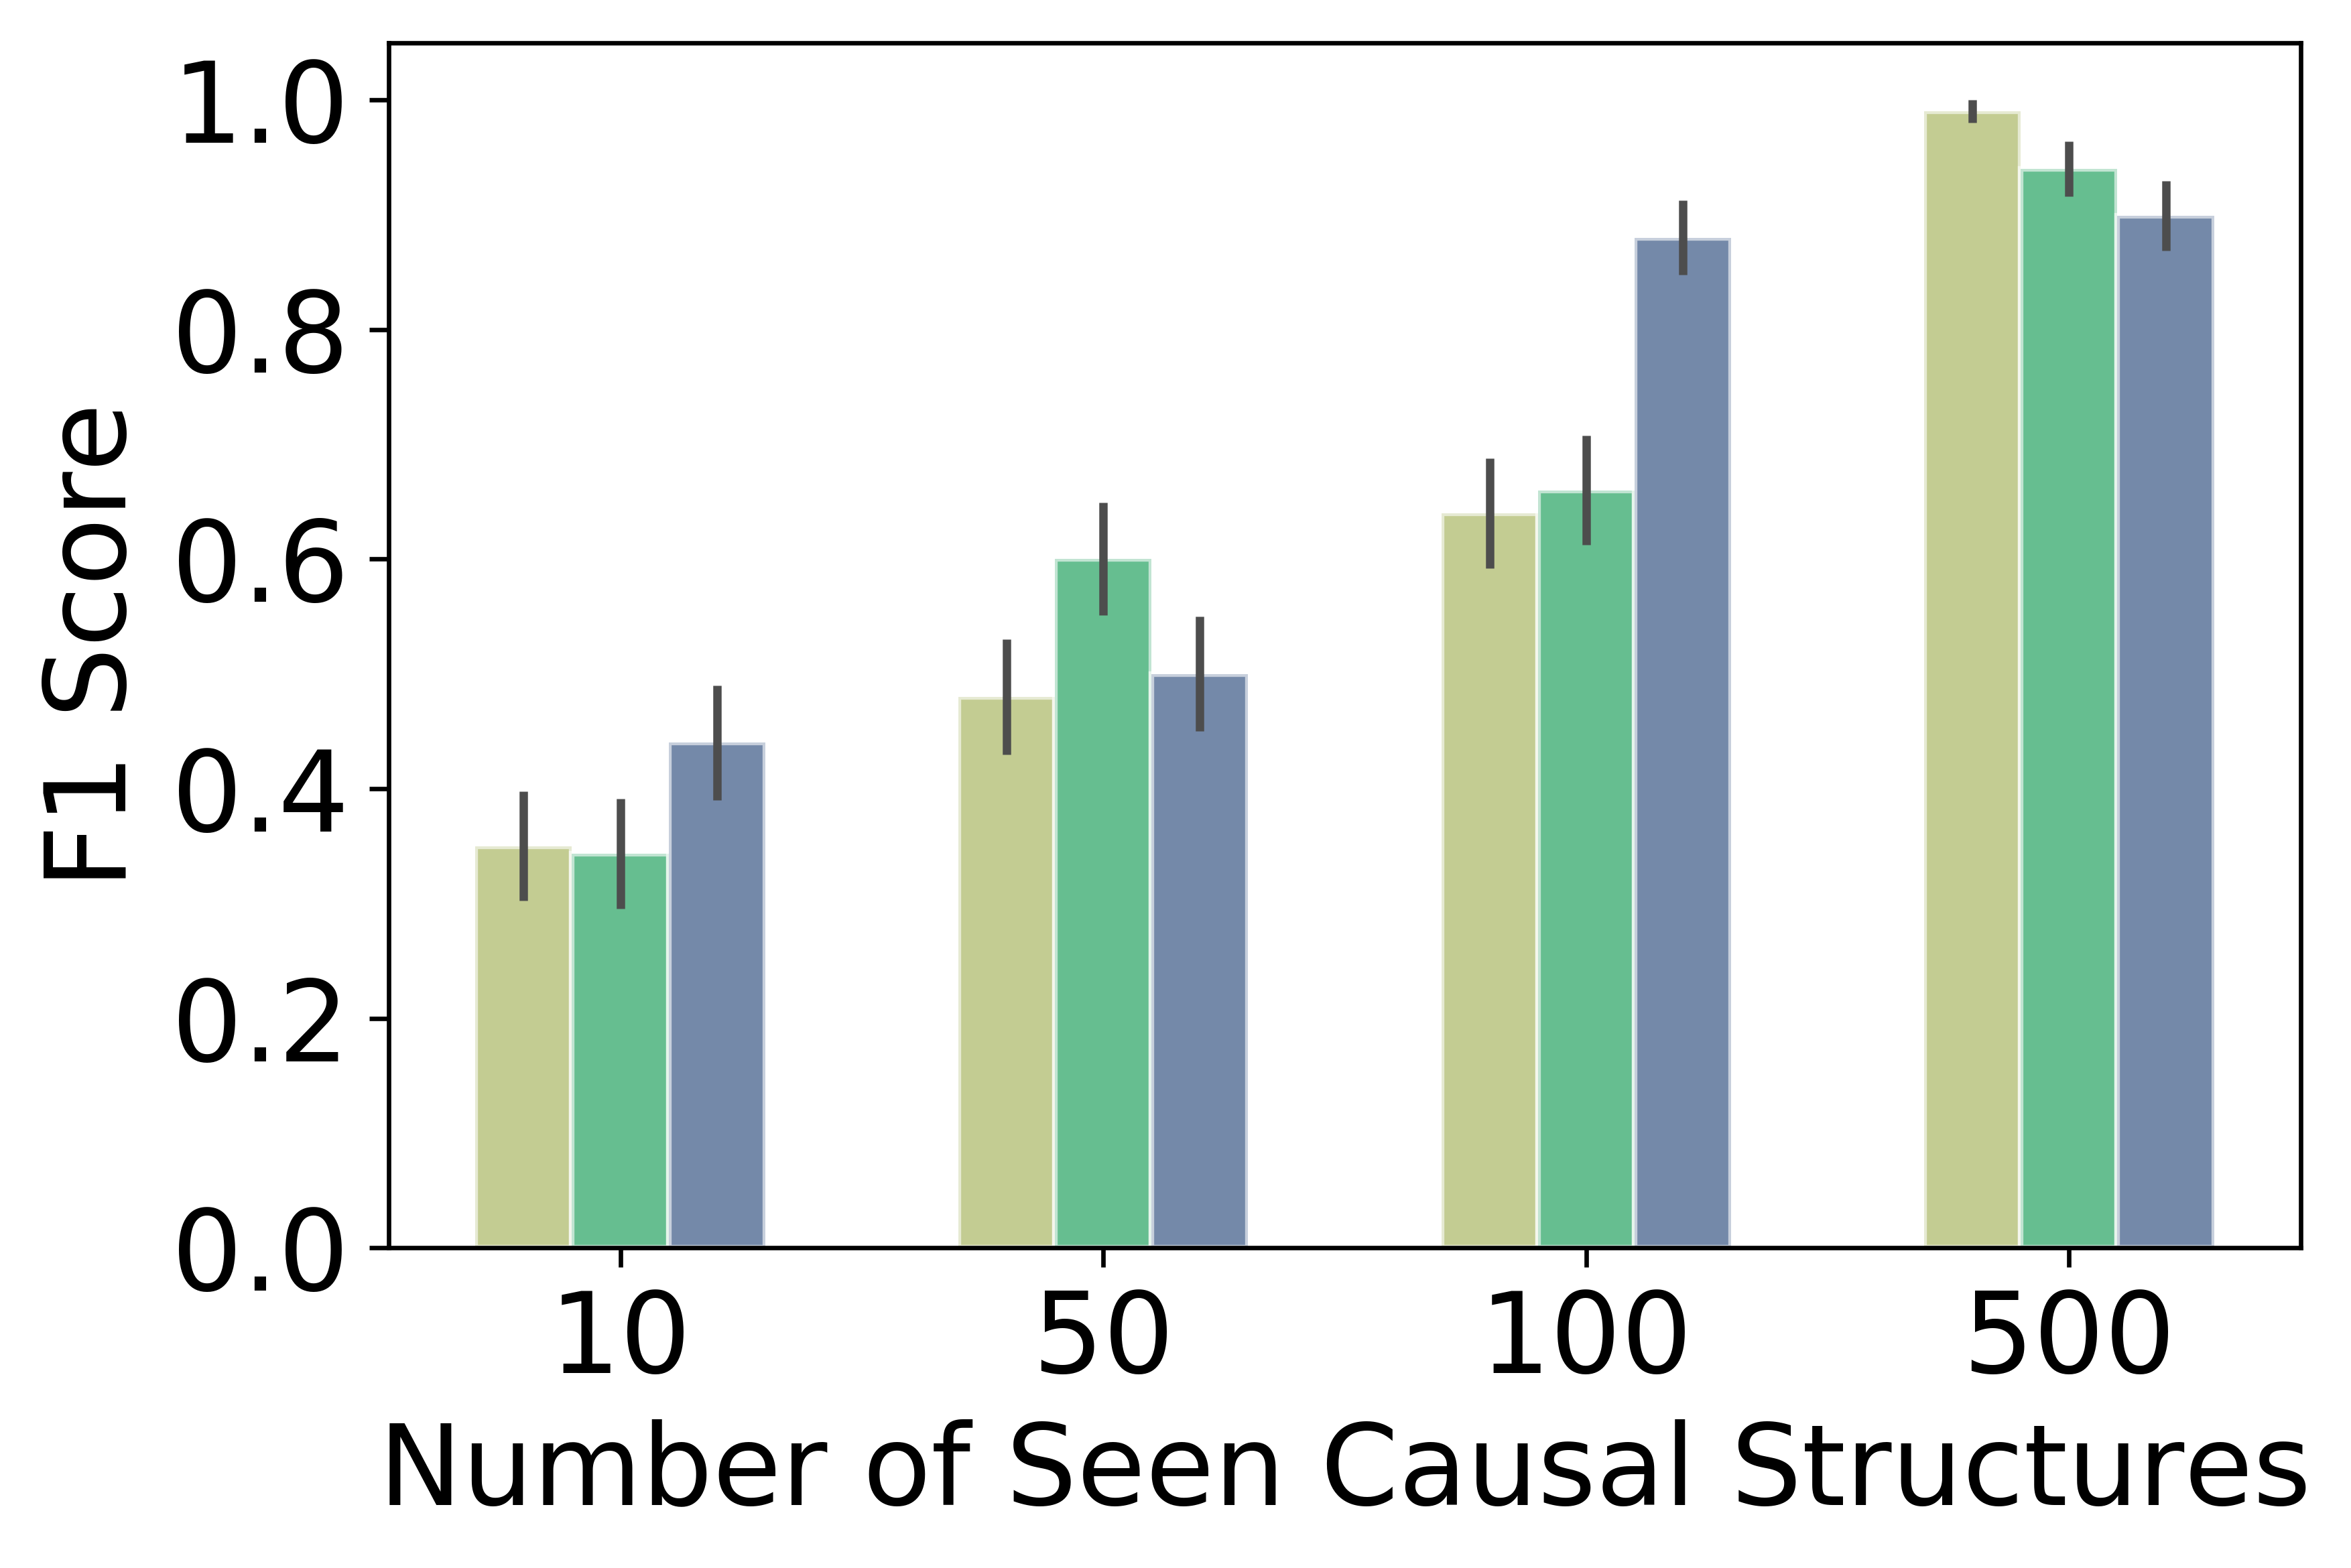

In [23]:
barplot("one_to_one", 5)
barplot("one_to_many", 5)
barplot("many_to_one", 5)
barplot("masterswitch", 5)

# barplot("one_to_one", 6)
# barplot("one_to_many", 6)
# barplot("many_to_one", 6)
# barplot("masterswitch", 6)

barplot("one_to_one", 7)
barplot("one_to_many", 7)
barplot("many_to_one", 7)
barplot("masterswitch", 7)